https://www.kaggle.com/code/pranjalsoni17/topic-modelling-using-lda

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-articles/articles.csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
import re
import os

#Opens a file in read mode  

count = 0;  
   
vocab = {}
ct = 0
file = open("dictnostops.txt", "r")
for line in file:
    words = line.split(" ")
    for i in words:
        if len(i) > 3:
            i = i.lower()
            i = re.sub(r'[^a-z]', '', i)
            vocab[i] = ct
            ct += 1
dict_len = ct
file.close()
print("Size of dictionary: " + str(dict_len))
print(vocab)


directory = "books"

book = []
page_length = 0
ct = 0
page = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = open(f, "r")    

    #Gets each line till end of file is reached  
    for line in file:  
        #Splits each line into words  
        words = line.split(" ");  
        for i in words:
            i = i.lower()
            i = re.sub(r'[^a-z]', '', i)
            if len(i) != 0:
                page_length += 1
                if i in vocab:
                    if page_length < 1000:
                        page.append(i)
                    else:
                        book.append(page)
                        page = []
                        page_length = 0

    book.append(page)

count = 0
for page in book:
    count += len(page)

print("Number of words present in given file: " + str(count))
file.close();  
print(book[0])
print(len(book))

Size of dictionary: 7702
{'writings': 0, 'yellow': 1, 'four': 2, 'woods': 3, 'hanging': 4, 'marching': 5, 'looking': 6, 'rouse': 7, 'lord': 8, 'sagde': 9, 'meadows': 10, 'sinking': 11, 'foul': 12, 'bringing': 13, 'disturb': 14, 'uttering': 15, 'scholar': 16, 'wooden': 17, 'wednesday': 18, 'haben': 19, 'persisted': 20, 'succession': 21, 'specially': 22, 'nigh': 23, 'tired': 24, 'miller': 25, 'bacon': 26, 'pulse': 27, 'elegant': 28, 'second': 29, 'valiant': 30, 'sailed': 31, 'errors': 32, 'thunder': 33, 'cooking': 34, 'contributed': 35, 'fingers': 36, 'increasing': 37, 'etexts': 38, 'dort': 39, 'hero': 40, 'leaning': 41, 'herd': 42, 'reported': 43, 'china': 44, 'herr': 45, 'substance': 46, 'elaborate': 47, 'climbed': 48, 'reports': 49, 'controversy': 50, 'ueber': 51, 'natures': 52, 'military': 53, 'criticism': 54, 'golden': 55, 'divide': 56, 'explained': 57, 'replace': 58, 'brought': 59, 'stern': 60, 'spoke': 61, 'leurs': 62, 'music': 63, 'telegraph': 64, 'mystic': 65, 'strike': 66, 'pap

In [4]:
import pandas as pd

# Example 2D array with different row lengths
data = book

# Find the maximum row length
max_length = max(len(row) for row in data)

# Pad shorter rows with empty strings
data_padded = [row + [''] * (max_length - len(row)) for row in data]

# Convert the 2D array to a Pandas DataFrame
df = pd.DataFrame(data_padded, columns=[f'col{i+1}' for i in range(max_length)])

# Combine each row into a string under the 'text' column
df['text'] = df.apply(lambda row: ' '.join(row), axis=1)

# Drop the original columns
medium_articles = df.drop(columns=[f'col{i+1}' for i in range(max_length)])

medium_articles['author'] = ['author' + str(np.random.randint(0, 10)) for i in range(len(df))]
medium_articles['claps'] = [str(i) + 'K' for i in range(len(df))]

# Print the resulting DataFrame
medium_articles.head()

,text,author,claps
0,project gutenberg ebook adventures ebook unite...,author6,0K
1,hope theyll remember milk dear wish air afraid...,author0,1K
2,back table found possibly reach see quite plai...,author9,2K
3,ill try know things know let see four times fi...,author2,3K
4,alice soothing tone dont angry wish show cat t...,author2,4K


Total Number of unique authors : 10


c:\Users\exal7\miniconda3\envs\fall2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\exal7\miniconda3\envs\fall2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\exal7\miniconda3\envs\fall2023\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\exal7\miniconda3\envs\fall2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

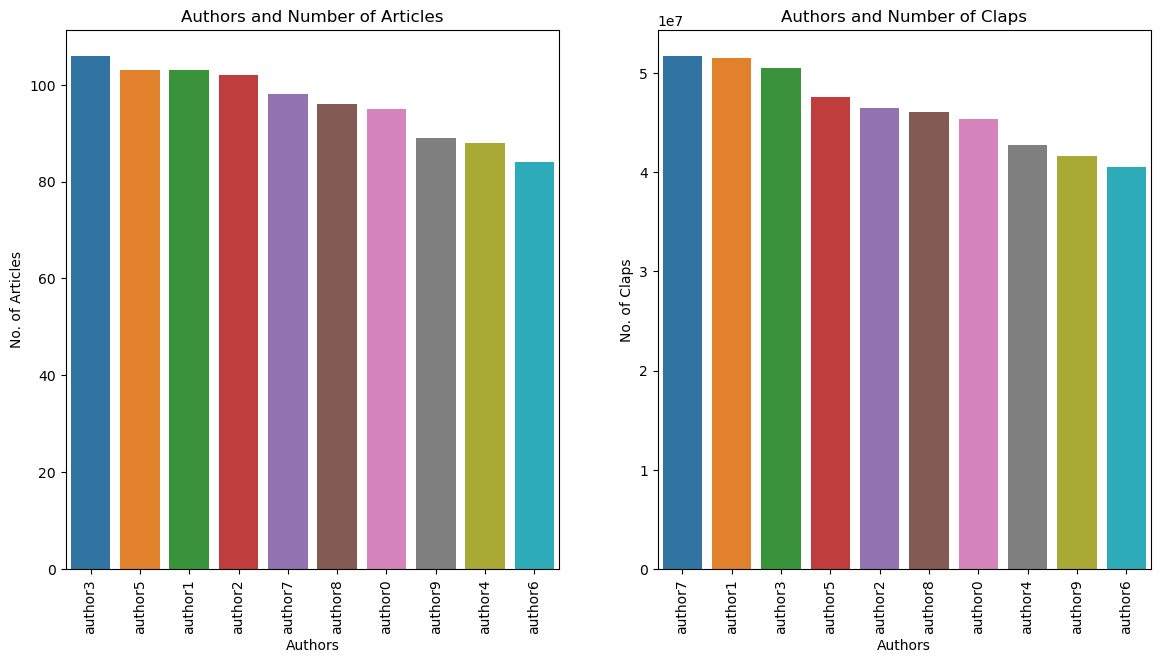

In [5]:
article_text = medium_articles.text
# visualise first article print few words from it
#print("First 1000 words in first article are : \n",article_text[0][:1000])

#total number of author
print(f"Total Number of unique authors : {len(medium_articles.author.unique())}")

#counting the articles of different authors
article_counts = dict()
for author in medium_articles.author:
    article_count = len(medium_articles[medium_articles["author"]==author])
    article_counts[author] = article_count

#sorting the article_counts on the basis of article count
article_counts = dict(sorted(article_counts.items(), key=lambda x: x[1], reverse=True))


#plot histogram of top 10 authors and their article counts
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.barplot(x = list(article_counts.keys())[:10],y=list(article_counts.values())[:10])
plt.title("Authors and Number of Articles")
plt.xlabel("Authors")
plt.ylabel("No. of Articles")
plt.xticks(rotation = 90) 



#counting the total number of claps for each author
def convert_to_num(clap_count):
    if "K" in clap_count:
        if "." in clap_count:
            clap_count = re.sub("\.","",clap_count[:-1])+"00"
        else:
            clap_count = clap_count[:-1]+"000"
    return(int(clap_count))

medium_articles.claps = medium_articles.claps.apply(convert_to_num)

#couting total number of claps for each author
clap_counts = dict()
for author in medium_articles.author:
    clap_count = medium_articles[medium_articles["author"]==author]["claps"]
    clap_counts[author] = sum(clap_count)

#sort clap_counts on the basis of counting of claps
clap_counts = dict(sorted(clap_counts.items(), key=lambda x: x[1], reverse=True))

#plot histogram of top 10 authors and their article counts
plt.subplot(1, 2, 2)
sns.barplot(x = list(clap_counts.keys())[:10],y=list(clap_counts.values())[:10])
plt.title("Authors and Number of Claps")
plt.xlabel("Authors")
plt.ylabel("No. of Claps")
plt.xticks(rotation = 90) 
plt.show()

In [6]:
#lowercase the articles 
medium_articles.text = medium_articles.text.apply(lambda t : t.lower())

In [7]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the text data
medium_articles.text = medium_articles.text.apply(lambda x:expand_contractions(x))

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exal7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\exal7\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package punkt is already up-to-date!


In [9]:
print(f"These are the pucntions which string.punctuation consist :  {string.punctuation}")

These are the pucntions which string.punctuation consist :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
stop_words = set(stopwords.words('english')) 

def remove_stopwords(article):
    "Return the articel after remvoing stopwords"
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in stop_words] 
    return " ".join(filtered_article)


#removing stopwords
medium_articles.text = medium_articles.text.apply(remove_stopwords)

#removing Punctuations 
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing digits
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('\w*\d\w*','', x))

medium_articles.text[50]

'catch anybody fallen purpose made endeavouring seize understanding instantly direction sister cried wasnt fair really last caught spite rapid past got corner escape conduct pretending know pretending necessary touch assure identity pressing ring finger chain neck vile monstrous doubt told opinion office confidential curtains niece party made comfortable large chair corner ghost close joined loved love admiration letters likewise game great secret joy nephew beat sisters hollow sharp girls told twenty people young old played wholly forgetting interest going voice made sound ears came guess quite loud guessed quite right needle best cut eye head ghost greatly pleased mood looked favour begged like boy allowed stay guests departed spirit said done new game said half hour spirit game called nephew think rest answering questions case fire questioning exposed thinking animal live animal disagreeable animal savage animal animal growled talked lived london walked streets wasnt made show wasnt

In [11]:
def remove_extra_marks(article):
    extra_keys = ["’","—","”","“"]
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in extra_keys] 
    return " ".join(filtered_article)
    
medium_articles.text = medium_articles.text.apply(remove_extra_marks)

In [12]:
#printing arbitrary example to visulise clean data
medium_articles.text[50]

'catch anybody fallen purpose made endeavouring seize understanding instantly direction sister cried wasnt fair really last caught spite rapid past got corner escape conduct pretending know pretending necessary touch assure identity pressing ring finger chain neck vile monstrous doubt told opinion office confidential curtains niece party made comfortable large chair corner ghost close joined loved love admiration letters likewise game great secret joy nephew beat sisters hollow sharp girls told twenty people young old played wholly forgetting interest going voice made sound ears came guess quite loud guessed quite right needle best cut eye head ghost greatly pleased mood looked favour begged like boy allowed stay guests departed spirit said done new game said half hour spirit game called nephew think rest answering questions case fire questioning exposed thinking animal live animal disagreeable animal savage animal animal growled talked lived london walked streets wasnt made show wasnt

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')
print(f""" "helps" after lemmztization :  {nlp("helps")[0].lemma_}""")
print(f""" "helping" after lemmztization :  {nlp("helping")[0].lemma_}""")

 "helps" after lemmztization :  help
 "helping" after lemmztization :  help


In [14]:
def lemmatize(text):
    """Return text after performing the lemmztiztion"""
    doc = nlp(text)
    tokens = [token for token in doc]
    return  " ".join([token.lemma_ for token in doc])

#lemmatize the articles
medium_articles.text = medium_articles.text.apply(lemmatize)

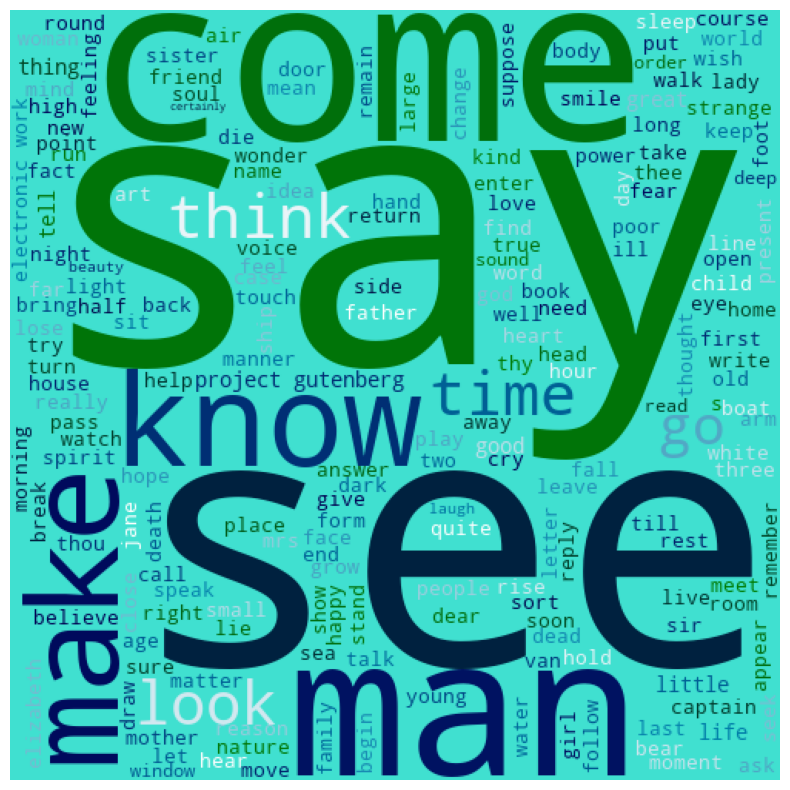

In [ ]:
import wordcloud
from wordcloud import WordCloud

#combine all the articles
article_data = ""
for article in medium_articles.text:
    article_data = article_data+" "+article

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#tokenize articles
tokeize_article = medium_articles.text.apply(lambda x : x.split())
id2word = corpora.Dictionary(tokeize_article)

# Create Corpus
texts = tokeize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


#printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

[('I', 2),
 ('actually', 1),
 ('adventure', 4),
 ('advice', 1),
 ('air', 1),
 ('alice', 10),
 ('aloud', 1),
 ('arthur', 1),
 ('ask', 3),
 ('australia', 1),
 ('author', 1),
 ('away', 1),
 ('bank', 1),
 ('beginning', 1),
 ('bill', 1),
 ('book', 2),
 ('brave', 1),
 ('burn', 1),
 ('centre', 1),
 ('chapter', 13),
 ('check', 1),
 ('close', 1),
 ('come', 3),
 ('consider', 2),
 ('content', 1),
 ('copy', 1),
 ('cost', 1),
 ('country', 2),
 ('curiosity', 1),
 ('dark', 1),
 ('date', 1),
 ('david', 1),
 ('day', 1),
 ('dear', 2),
 ('deep', 2),
 ('disappointment', 1),
 ('do', 1),
 ('downward', 1),
 ('drop', 1),
 ('earth', 2),
 ('ebook', 6),
 ('edition', 1),
 ('empty', 1),
 ('end', 1),
 ('english', 1),
 ('evidence', 1),
 ('eye', 1),
 ('fall', 9),
 ('fear', 1),
 ('feel', 1)]

In [ ]:
# build LDA model for 10 topic
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"chapter" + 0.001*"dick" + 0.000*"dan" + 0.000*"lucy" + 0.000*"dat" + '
  '0.000*"diana" + 0.000*"della" + 0.000*"barbara" + 0.000*"pulpit" + '
  '0.000*"dutch"'),
 (1,
  '0.016*"minister" + 0.012*"woman" + 0.011*"child" + 0.011*"life" + '
  '0.009*"scarlet" + 0.008*"man" + 0.007*"little" + 0.006*"new" + 0.006*"make" '
  '+ 0.006*"world"'),
 (2,
  '0.001*"dat" + 0.000*"tough" + 0.000*"oder" + 0.000*"wid" + 0.000*"resting" '
  '+ 0.000*"addressing" + 0.000*"must" + 0.000*"preach" + 0.000*"cook" + '
  '0.000*"decision"'),
 (3,
  '0.000*"les" + 0.000*"plus" + 0.000*"sur" + 0.000*"roi" + 0.000*"par" + '
  '0.000*"tre" + 0.000*"tout" + 0.000*"comme" + 0.000*"milieu" + 0.000*"mais"'),
 (4,
  '0.033*"say" + 0.020*"come" + 0.018*"good" + 0.015*"look" + 0.014*"know" + '
  '0.012*"man" + 0.011*"tell" + 0.011*"see" + 0.011*"make" + 0.011*"go"'),
 (5,
  '0.015*"mrs" + 0.015*"woman" + 0.013*"lady" + 0.009*"say" + 0.009*"make" + '
  '0.008*"know" + 0.008*"elizabeth" + 0.007*"girl" + 0.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.096441 -0.124896       1        1  26.201095
4     -0.066146 -0.172512       2        1  25.908013
5     -0.006623 -0.176828       3        1  21.268820
1     -0.031083 -0.069893       4        1  12.204586
9      0.383125  0.028292       5        1   6.752180
6      0.084820  0.003651       6        1   5.980334
7     -0.111659  0.189677       7        1   1.323575
0     -0.052324  0.107717       8        1   0.263696
3     -0.051821  0.107394       9        1   0.058197
2     -0.051848  0.107397      10        1   0.039502, topic_info=           Term         Freq        Total Category  logprob  loglift
444        work  2549.000000  2549.000000  Default  30.0000  30.0000
140     project  1142.000000  1142.000000  Default  29.0000  29.0000
68    gutenberg  1125.000000  1125.000000  Default  28.0000  28.0000
2685       thou   683.000000   683.000000  Default  27.0000  27.0000
153         say  3447.000000  3447.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4571  countless     0.022061    19.272496  Topic10  -8.6611   1.0639
535     welcome     0.022048   124.540483  Topic10  -8.6616  -0.8026
1067      blame     0.022029    27.026217  Topic10  -8.6625   0.7244
4229    deliver     0.022006    22.837849  Topic10  -8.6636   0.8917
2562      angel     0.021985    96.547867  Topic10  -8.6645  -0.5508

[631 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
348       1  0.005498    able
348       2  0.104454    able
348       3  0.832883    able
348       4  0.021990    able
348       6  0.030237    able
...     ...       ...     ...
2169      4  0.005167  yonder
2169      7  0.015500  yonder
213       1  0.032892     you
213       2  0.920972     you
213       3  0.032892     you

[2502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 6, 2, 10, 7, 8, 1, 4, 3])

In [ ]:
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.507544802902965

Coherence Score:  0.5947987450224821


In [ ]:
import time
def calculate_coherence_score(n, alpha, beta):
    start_time = time.time()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    model_time = time.time() - start_time
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    co_time = time.time() - model_time - start_time
    return coherence_lda, model_time, co_time

#list containing various hyperparameters
no_of_topics = [2,5,10,20]
alpha_list = ['symmetric',0.3,0.5,0.7]
beta_list = ['auto',0.3,0.5,0.7]

max_coh = 0
max_param = [no_of_topics[0], alpha_list[0], beta_list[0]]
for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score, t, co_t = calculate_coherence_score(n, alpha, beta)
            if max_coh < coherence_score:
                max_param = [n, alpha, beta]
                max_coh = coherence_score
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score} ; Model Time : {t} seconds ; Coherence Time : {co_t} seconds")

n : 2 ; alpha : symmetric ; beta : auto ; Score : 0.4698650836806359 ; Model Time : 5.347370147705078 seconds ; Coherence Time : 18.22115707397461 seconds
n : 2 ; alpha : symmetric ; beta : 0.3 ; Score : 0.4937160702686537 ; Model Time : 4.672286748886108 seconds ; Coherence Time : 18.338017463684082 seconds
n : 2 ; alpha : symmetric ; beta : 0.5 ; Score : 0.4698650836806359 ; Model Time : 17.880939245224 seconds ; Coherence Time : 18.98561930656433 seconds
n : 2 ; alpha : symmetric ; beta : 0.7 ; Score : 0.4698650836806359 ; Model Time : 24.47286033630371 seconds ; Coherence Time : 17.767754793167114 seconds
n : 2 ; alpha : 0.3 ; beta : auto ; Score : 0.46986508368063595 ; Model Time : 24.171319007873535 seconds ; Coherence Time : 17.767198085784912 seconds
n : 2 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.46986508368063595 ; Model Time : 23.394803524017334 seconds ; Coherence Time : 21.71734380722046 seconds
n : 2 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.46986508368063595 ; Model Time : 13.

took 46m 51.4s

In [ ]:
chunksize = [1,10,100, len(corpus)]
[n, alpha, beta] = max_param
min_time = 100000
min_chunk = 1
for chunk in chunksize:
    start_time = time.time()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=chunk,
                                           passes=20,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    model_time = time.time() - start_time
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    co_time = time.time() - model_time - start_time
    if model_time < min_time:
        min_time = model_time
        min_chunk = chunk
    print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Chunksize : {chunk} ; Score : {coherence_lda} ; Model Time : {model_time} seconds ; Coherence Time : {co_time} seconds")

print(max_param, min_chunk)

n : 20 ; alpha : 0.3 ; beta : 0.5 ; Chunksize : 1 ; Score : 0.5092773949750019 ; Model Time : 174.4029986858368 seconds ; Coherence Time : 17.4715895652771 seconds
n : 20 ; alpha : 0.3 ; beta : 0.5 ; Chunksize : 10 ; Score : 0.5125429413367673 ; Model Time : 24.40526819229126 seconds ; Coherence Time : 16.988965034484863 seconds
n : 20 ; alpha : 0.3 ; beta : 0.5 ; Chunksize : 100 ; Score : 0.6516034259970919 ; Model Time : 9.71883749961853 seconds ; Coherence Time : 17.377824306488037 seconds
n : 20 ; alpha : 0.3 ; beta : 0.5 ; Chunksize : 964 ; Score : 0.44090609881384424 ; Model Time : 21.39511728286743 seconds ; Coherence Time : 17.356575965881348 seconds
[20, 0.3, 0.5] 100


In [ ]:
[n, alpha, beta] = [20,0.3,0.5] # max_param
min_chunk = 100
def lda(corpus, n, alpha, beta, min_chunk, passes):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=n, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=min_chunk,
                                            passes=passes,
                                            alpha=alpha,
                                            per_word_topics=True,
                                            eta = beta)
    return lda_model
lda_model = lda(corpus, n, alpha, beta, min_chunk, 20)
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nPerplexity : ', lda_model.log_perplexity(corpus))
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.325164055141947

Coherence Score:  0.6516034259970919


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
4      0.255500+0.000000j  0.029603+0.000000j       1        1  20.487286
2      0.188199+0.000000j  0.047956+0.000000j       2        1  16.606582
10     0.179914+0.000000j -0.014498+0.000000j       3        1  14.003888
9      0.160031+0.000000j -0.064351+0.000000j       4        1  10.814415
6      0.059427+0.000000j  0.082592+0.000000j       5        1  10.339098
12     0.132730+0.000000j  0.070629+0.000000j       6        1   9.939230
16    -0.005064+0.000000j -0.355606+0.000000j       7        1   6.669761
13     0.036559+0.000000j  0.042316+0.000000j       8        1   6.405718
19    -0.055330+0.000000j -0.128050+0.000000j       9        1   2.335187
14    -0.144950+0.000000j  0.078476+0.000000j      10        1   1.498757
8     -0.080702+0.000000j  0.021093+0.000000j      11        1   0.090008
1     -0.080702+0.000000j  0.021093+0.000000j      12        1   0.090008
11    -0.080702+0.000000j  0.021093+0.000000j      13        1   0.090008
7     -0.080702+0.000000j  0.021093+0.000000j      14        1   0.090008
5     -0.080702+0.000000j  0.021093+0.000000j      15        1   0.090008
15    -0.080702+0.000000j  0.021093+0.000000j      16        1   0.090008
3     -0.080702+0.000000j  0.021093+0.000000j      17        1   0.090008
17    -0.080702+0.000000j  0.021093+0.000000j      18        1   0.090008
18    -0.080702+0.000000j  0.021093+0.000000j      19        1   0.090008
0     -0.080702+0.000000j  0.021093+0.000000j      20        1   0.090008, topic_info=            Term         Freq        Total Category  logprob  loglift
444         work  1901.000000  1901.000000  Default  30.0000  30.0000
140      project  1133.000000  1133.000000  Default  29.0000  29.0000
68     gutenberg  1100.000000  1100.000000  Default  28.0000  28.0000
2685        thou   636.000000   636.000000  Default  27.0000  27.0000
153          say  3397.000000  3397.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1191  occasional     0.049596    33.355101  Topic20  -8.6745   0.5020
2355      severe     0.049596    34.781300  Topic20  -8.6745   0.4601
4510       shift     0.049595    10.829401  Topic20  -8.6745   1.6269
747      message     0.049595    42.464090  Topic20  -8.6745   0.2605
799          shy     0.049594    17.483921  Topic20  -8.6745   1.1479

[1668 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.919883        I
0         2  0.016426        I
0         5  0.016426        I
0         8  0.016426        I
974       1  0.113738    abide
...     ...       ...      ...
716       8  0.054781    young
4588      1  0.184002  zealous
4588      2  0.184002  zealous
4588      5  0.184002  zealous
4588      8  0.184002  zealous

[4018 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 11, 10, 7, 13, 17, 14, 20, 15, 9, 2, 12, 8, 6, 16, 4, 18, 19, 1])

In [ ]:
# Return topic distribution for an article sorted by probability.
script_idx = 0
topics = sorted(lda_model.get_document_topics(corpus[script_idx]), key=lambda t: t[1])[::-1]
topics

[(4, 0.7126868),
 (16, 0.12464635),
 (6, 0.11170081),
 (10, 0.021337325),
 (9, 0.015660675)]

In [ ]:
# Print topic proportion in corpus
topics = list(lda_model.get_document_topics(corpus, minimum_probability=0))
for t in range(20):
    print(f"Topic {t} proportion: {100*sum([pair[t][1] for pair in topics])/len(topics):.1f}%")

vl = [0] * 20
for i in range(20):
    for j in topics:
        if j[i][1] > 0.1:
            vl[i] += 1\

for t in range(20):
    print(f"Topic {t} has proportion: {vl[t] * 100 / len(topics):.1f}% of documents greater than 20%")
vj = []
for i in range(20):
    vl[i] = vl[i] * 100 / len(topics)
    if vl[i] >= 0.1:
        vj.append((i,vl[i]))

for t in range(len(vj)):
    print(f"Topic {vj[t][0]} has proportion: {vj[t][1]:.1f}%")



Topic 0 proportion: 0.1%
Topic 1 proportion: 0.1%
Topic 2 proportion: 17.0%
Topic 3 proportion: 0.1%
Topic 4 proportion: 20.4%
Topic 5 proportion: 0.1%
Topic 6 proportion: 11.2%
Topic 7 proportion: 0.1%
Topic 8 proportion: 0.1%
Topic 9 proportion: 11.2%
Topic 10 proportion: 14.5%
Topic 11 proportion: 0.1%
Topic 12 proportion: 9.9%
Topic 13 proportion: 6.5%
Topic 14 proportion: 1.4%
Topic 15 proportion: 0.1%
Topic 16 proportion: 4.8%
Topic 17 proportion: 0.1%
Topic 18 proportion: 0.1%
Topic 19 proportion: 2.2%
Topic 0 has proportion: 0.0% of documents greater than 20%
Topic 1 has proportion: 0.0% of documents greater than 20%
Topic 2 has proportion: 45.3% of documents greater than 20%
Topic 3 has proportion: 0.0% of documents greater than 20%
Topic 4 has proportion: 51.6% of documents greater than 20%
Topic 5 has proportion: 0.0% of documents greater than 20%
Topic 6 has proportion: 24.8% of documents greater than 20%
Topic 7 has proportion: 0.0% of documents greater than 20%
Topic 8 ha

In [ ]:
import time
start_time = time.time()
lda_model = lda(corpus, n, alpha, beta, min_chunk, 1)
times = [time.time() - start_time]
#coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#coherence = [coherence_lda]
perplexity_lda = lda_model.log_perplexity(corpus)
perplexity = [perplexity_lda]
for i in range(100):
    start_time = time.time()
    lda_model.update(corpus)
    times.append(time.time() - start_time)
    #coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    #coherence_lda = coherence_model_lda.get_coherence()
    #coherence.append(coherence_lda)
    perplexity_lda = lda_model.log_perplexity(corpus)
    perplexity.append(perplexity_lda)

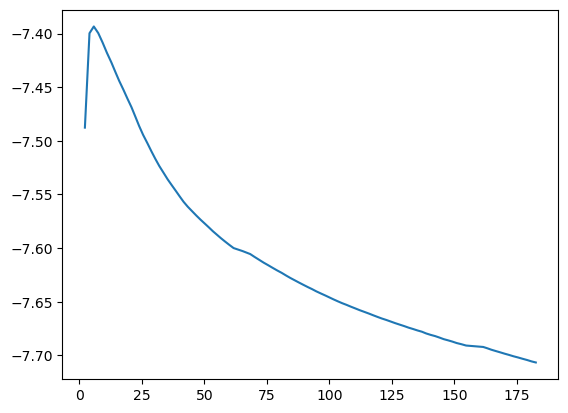

0.3815112741852788


In [ ]:
import matplotlib.pyplot as plt

sum_times = []
for i in times:
    if len(sum_times) == 0:
        sum_times.append(i)
    else:
        sum_times.append(sum_times[-1] + i)
plt.plot(sum_times, perplexity)
plt.show()
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

In [ ]:
import time

import random

temp_c = random.sample(corpus, min_chunk)
start_time = time.time()
lda_model = lda(temp_c, n, alpha, beta, min_chunk, 1)
times = [time.time() - start_time]
#coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#coherence = [coherence_lda]
perplexity_lda = lda_model.log_perplexity(corpus)
perplexity = [perplexity_lda]
for i in range(100):
    temp_c = random.sample(corpus, min_chunk)
    start_time = time.time()
    lda_model.update(temp_c)
    times.append(time.time() - start_time)
    #coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    #coherence_lda = coherence_model_lda.get_coherence()
    #coherence.append(coherence_lda)
    perplexity_lda = lda_model.log_perplexity(corpus)
    perplexity.append(perplexity_lda)

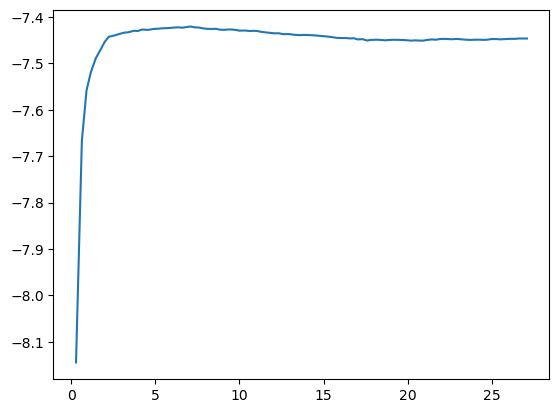

0.6200933717262866


In [ ]:
import matplotlib.pyplot as plt

sum_times = []
for i in times:
    if len(sum_times) == 0:
        sum_times.append(i)
    else:
        sum_times.append(sum_times[-1] + i)
plt.plot(sum_times, perplexity)
plt.show()
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)